# Practical Data Science: 2nd Assignmnet : SemEval 2025 Task 9: The Food Hazard Detection Challenge

---

> Evangelia P. Panourgia, Master Student in Data Science, AUEB <br />
> Department of Informatics, Athens University of Economics and Business <br />
> eva.panourgia@aueb.gr <br/><br/>

# Setting the Scene

For the scope of this assignment, we will utilize the following Python libraries to accomplish various tasks such as data manipulation, machine learning, natural language processing, visualization, and progress tracking.

### Core Libraries
- **`string`**: A built-in library for common string operations.  
  [Documentation String](https://docs.python.org/3/library/string.html)
- **`typing.Counter`**: A collection for counting hashable objects.  
  [Documentation Counter](https://docs.python.org/3/library/collections.html#collections.Counter)
- **`pandas`**: A fast, powerful, flexible, and easy-to-use open-source data analysis and manipulation tool built on top of the Python programming language.  
  [Documentation Pandas](https://pandas.pydata.org)
- **`numpy`**: A fundamental package for scientific computing in Python. It provides support for arrays, mathematical functions, linear algebra, and more.  
  [Documentation NumPy](https://numpy.org)
- **`sklearn.pipeline.Pipeline`**: A tool to sequentially apply a list of transforms and a final estimator.  
  [Documentation Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html)
- **`sklearn.linear_model.LogisticRegression`**: Logistic regression classifier.  
  [Documentation Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
- **`sklearn.ensemble.RandomForestClassifier`**: A random forest classifier.  
  [Documentation Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
- **`sklearn.feature_extraction.text.TfidfVectorizer`**: A vectorizer to convert a collection of text documents to a matrix of TF-IDF features.  
  [Documentation TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)
- **`sklearn.model_selection.train_test_split`**: Utility to split arrays or matrices into random train and test subsets.  
  [Documentation Train Test Split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
- **`sklearn.model_selection.StratifiedKFold`**: Cross-validator for stratified K-folds.  
  [Documentation StratifiedKFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html)
- **`sklearn.metrics`**: Metrics for model evaluation, including `f1_score` and `classification_report`.  
  [Documentation Metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics)
- **`imblearn.over_sampling.SMOTE`**: Synthetic Minority Oversampling Technique for dealing with imbalanced datasets.  
  [Documentation SMOTE](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html)
- **`nltk.tokenize.word_tokenize`**: A tokenizer for splitting text into words.  
  [Documentation Word Tokenize](https://www.nltk.org/api/nltk.tokenize.html#nltk.tokenize.word_tokenize)
- **`nltk.corpus.stopwords`**: A collection of stop words for various languages.  
  [Documentation Stopwords](https://www.nltk.org/nltk_data/)
- **`nltk.stem.WordNetLemmatizer`**: A lemmatizer based on WordNet.  
  [Documentation WordNetLemmatizer](https://www.nltk.org/api/nltk.stem.html#nltk.stem.WordNetLemmatizer)
- **`nltk.stem.PorterStemmer`**: A stemmer based on Porter’s algorithm.  
  [Documentation PorterStemmer](https://www.nltk.org/api/nltk.stem.html#nltk.stem.PorterStemmer)
- **`deep_translator.GoogleTranslator`**: A library for translating text using Google Translate.  
  [Documentation GoogleTranslator](https://deep-translator.readthedocs.io/)
- **`langid`**: A tool for language identification.  
  [Documentation LangID](https://github.com/saffsd/langid.py)
- **`matplotlib.pyplot`**: A comprehensive library for creating static, animated, and interactive visualizations in Python.  
  [Documentation Matplotlib](https://matplotlib.org)
- **`sklearn.utils.shuffle`**: A utility to shuffle arrays or sparse matrices.  
  [Documentation Shuffle](https://scikit-learn.org/stable/modules/generated/sklearn.utils.shuffle.html)

### Notes
- Ensure the necessary NLTK data files are downloaded:
  ```python
  import nltk
  nltk.download('punkt')
  nltk.download('stopwords')
  nltk.download('wordnet')


In [1]:
!pip install langid --upgrade transformers --upgrade sentencepiece googletrans langdetect deep-translator nltk

In [2]:
# Core libraries
import string
from typing import Counter

# Data manipulation and analysis
import pandas as pd
import numpy as np

# Machine learning and model building
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import f1_score, classification_report

# Oversampling techniques for imbalanced datasets
from imblearn.over_sampling import SMOTE

# Natural Language Processing (NLP)
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer

# Translation and language detection
from deep_translator import GoogleTranslator
import langid

# Visualization
import matplotlib.pyplot as plt

# Shuffle utility
from sklearn.utils import shuffle

# Ensure necessary NLTK data is downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

import warnings
warnings.filterwarnings('ignore')

import os


[nltk_data] Downloading package punkt to /Users/evangelia/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/evangelia/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/evangelia/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


##  Dataset Explanation


To begin our analysis, we must thoroughly understand each column in the dataset. This involves comprehensively reviewing and interpreting the dataset to establish a clear understanding of the problem we aim to address. All insights start with a solid understanding of our data.

### Dataset Information

The dataset for used in this project is hosted on the following link:

- [labeled trial/training data (5,082 samples)](https://github.com/food-hazard-detection-semeval-2025/food-hazard-detection-semeval-2025.github.io/blob/main/data/incidents_train.csv)

### Column Descriptions

The dataset contains the following columns, each playing a specific role in the analysis:

- **`hazard`**: Detailed descriptions of identified hazards. This column contains `261 classes`, offering a granular view of various hazard types.
  
- **`hazard-category`**: A categorized version of the hazard classification, organized into `10 classes`. This simplified classification assists in broader hazard categorization.
  
- **`product`**: Detailed descriptions of products involved in food recall incidents, encompassing `1,256 classes`. This column provides a comprehensive product categorization.
  
- **`product-category`**: A high-level categorization of the product classification, grouped into `22 classes`, to support simplified product analysis.

- **`title`**: Key parts of the title relevant to  food inident.

- **`text`**: Key parts of the text relevant to  food inident.

- **Metadata**:
  - `year`: Year of the incident.
  - `month`: Month of the incident.
  - `day`: Day of the incident.
  - `language`: Language of the document.
  - `country`: Country where the incident occurred.

## Data Load

- Let's organize the workflow by creating a data directory (if it doesn't exist), downloading the dataset into it, and loading it into a DataFrame for streamlined data handling and analysis.

In [3]:
# Create a directory named 'data' if it doesn't exist
os.makedirs('data', exist_ok=True)
# Download the CSV file into the 'data' folder
!wget -O data/incidents_train.csv https://raw.githubusercontent.com/food-hazard-detection-semeval-2025/food-hazard-detection-semeval-2025.github.io/main/data/incidents_train.csv
# Load the dataset from the 'data' folder
df_food_trial = pd.read_csv('data/incidents_train.csv', index_col=0)
# Display a sample of the dataset
df_food_trial.sample()

--2024-11-19 23:54:28--  https://raw.githubusercontent.com/food-hazard-detection-semeval-2025/food-hazard-detection-semeval-2025.github.io/main/data/incidents_train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8000::154, 2606:50c0:8001::154, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8000::154|:443... connected.


## Data Exploration in Training Set 

- We will begin by exploring our dataframe:
    - First, we will examine its dimensions to understand the size and structure.
    - Additionally, we will check for any missing values to assess data completeness.

In [ ]:
df_food_trial.shape

(5082, 10)

In [ ]:
df_food_trial.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5082 entries, 0 to 5983
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   year              5082 non-null   int64 
 1   month             5082 non-null   int64 
 2   day               5082 non-null   int64 
 3   country           5082 non-null   object
 4   title             5082 non-null   object
 5   text              5082 non-null   object
 6   hazard-category   5082 non-null   object
 7   product-category  5082 non-null   object
 8   hazard            5082 non-null   object
 9   product           5082 non-null   object
dtypes: int64(3), object(7)
memory usage: 436.7+ KB


- After examining the dataset, we confirmed that there are **no missing values**, as the Non-Null Count for all columns matches the total number of rows (5082), ensuring data completeness.
- To ensure consistency and facilitate processing, we will convert all columns with a data type of "object" to "string."

In [ ]:
df_food_trial = df_food_trial.astype({col: 'string' for col in df_food_trial.select_dtypes(include='object').columns}) # Convert all columns with 'object' dtype to 'string'

### Exploring Countries with more detected Food Incidents
- We will continue to explore our data via focusing on the column `country`.
- A bar chart has been created to visualize the frequency of countries represented in the dataset, with professional formatting, clear labels, and annotations to indicate exact values for each bar.
- A dynamic legend has been included to provide detailed explanations for country abbreviations, enhancing interpretability and ensuring clarity for all viewers.

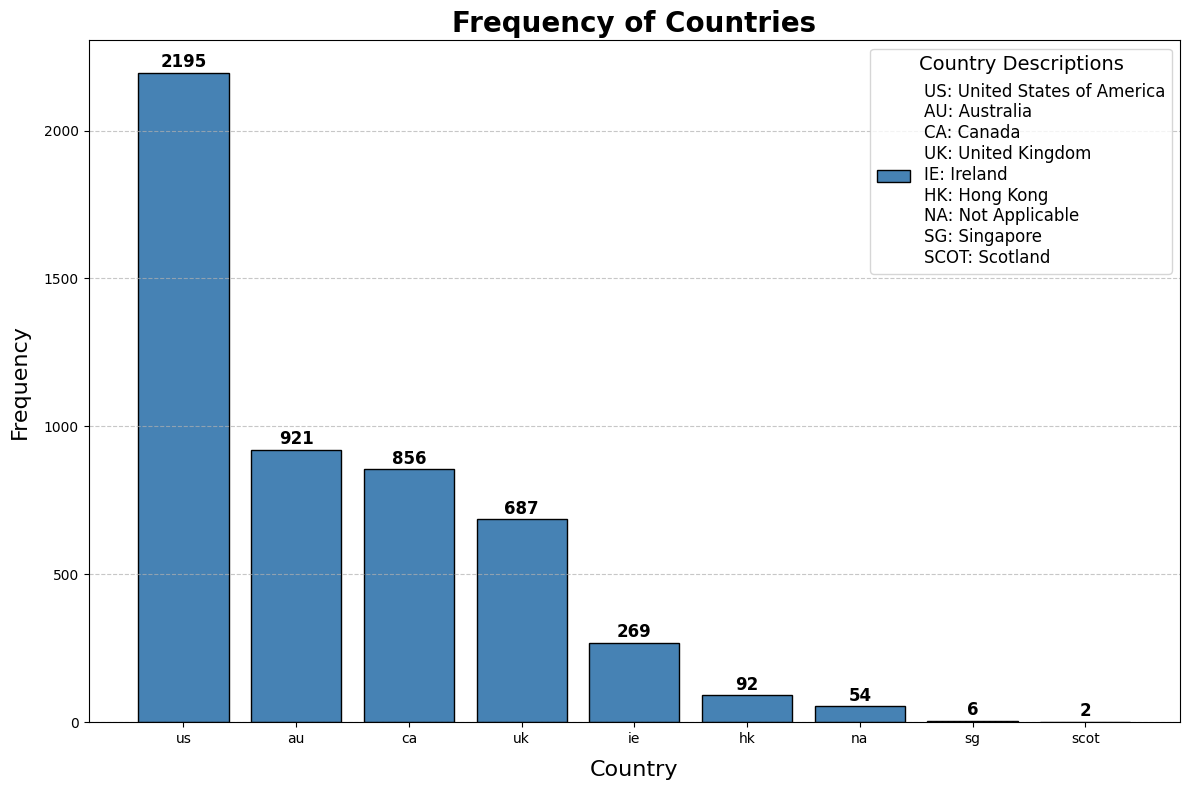

In [ ]:
country_frequencies = df_food_trial['country'].value_counts()

# Dictionary for country explanations
country_explanations = {
    "US": "United States of America",
    "AU": "Australia",
    "CA": "Canada",
    "UK": "United Kingdom",
    "IE": "Ireland",
    "HK": "Hong Kong",
    "NA": "Not Applicable",
    "SG": "Singapore",
    "SCOT": "Scotland"
}

# Plot with professional formatting
plt.figure(figsize=(12, 8))
bars = plt.bar(country_frequencies.index, country_frequencies.values, color='steelblue', edgecolor='black')

# Title and labels
plt.title('Frequency of Countries', fontsize=20, fontweight='bold')
plt.xlabel('Country', fontsize=16, labelpad=10)
plt.ylabel('Frequency', fontsize=16, labelpad=10)

# Annotate bars with their frequencies
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 5, f'{int(height)}',
             ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')

# Generate legend text dynamically
legend_text = "\n".join([f"{key}: {value}" for key, value in country_explanations.items()])
plt.legend([legend_text], loc='upper right', fontsize=12, frameon=True, title='Country Descriptions', title_fontsize=14)

# Add grid for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout for a clean look
plt.tight_layout()
plt.show()

- The plot clearly illustrates that the `majority of food incidents` occurred in the `US` (`United States of America`), with approximately `22,000` incidents.
- Following the US, `Australia` and `Canada` report a similar number of incidents, with only slight differences between them. `Scotland` recorded `the fewest food incidents`, indicating a significantly lower frequency.
- We will continue data exploration via combining the column `Year` and `Country` with purpose to detect the years per country having the most food incidents. 
    - Note : From previous graph regarding ountry, we wait being US.
- For this purpose we have the following : 
    - A line chart has been plotted to illustrate the trend of food incidents over the years for each country, with distinct line styles and markers assigned to ensure clarity and easy differentiation between countries.
    - The plot includes professional enhancements such as axis labels, a descriptive title, a legend highlighting country-specific trends, and a subtle grid for improved readability.
- Note: In our provided dataset we have data regarding food incidents for **9** countries. 

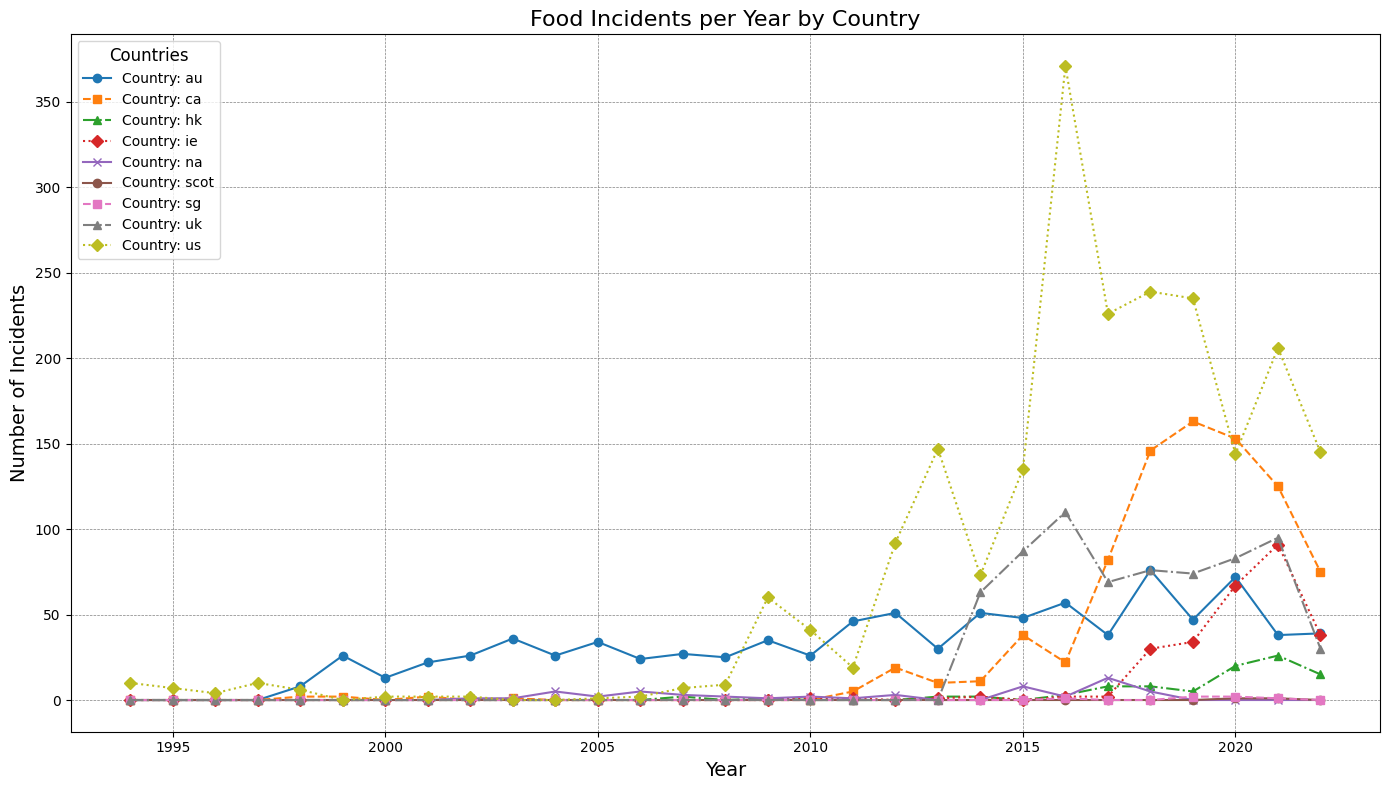

In [ ]:
# Group by year and country to count occurrences
incident_count_per_year_country = (
    df_food_trial.groupby(['year', 'country'])
    .size()
    .unstack(fill_value=0)  # Create a pivot table where rows = years, columns = countries
)

# Plotting the data
plt.figure(figsize=(14, 8))

# Define distinct line styles and markers for countries
line_styles = ['-', '--', '-.', ':', '-']
markers = ['o', 's', '^', 'D', 'x']

# Plot for each country
for i, country in enumerate(incident_count_per_year_country.columns):
    plt.plot(
        incident_count_per_year_country.index,
        incident_count_per_year_country[country],
        label=f"Country: {country}",
        marker=markers[i % len(markers)],
        linestyle=line_styles[i % len(line_styles)]
    )

# Adding labels and title
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Incidents', fontsize=14)
plt.title('Food Incidents per Year by Country', fontsize=16)
plt.legend(loc='upper left', fontsize=10, title="Countries", title_fontsize=12)

# Add a grid with a lighter color
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')

# Show the plot with tight layout
plt.tight_layout()
plt.show()

- We can observe that in 2016 in US the majority of food incidents presented.

In [ ]:
df_food_trial['hazard-category'][(df_food_trial['country']=='us')&(df_food_trial['year']==2016)].value_counts() # delve into data more. 

hazard-category
biological        194
allergens         120
fraud              28
foreign bodies     19
other hazard        6
chemical            4
Name: count, dtype: Int64

- And we can observe that the key majors for this year in US was the biological and allergens hazard. 

### Checking Language for columns "Title" & "Text"

- The code detects the language of the text in the `text` and `title` columns of the df_food_trial DataFrame and stores the language codes in new columns `language_text` and `language_title`.

In [ ]:
# Detect language for each text entry in the 'text' column
df_food_trial['language_text'] = df_food_trial['text'].apply(lambda x: langid.classify(x)[0])
df_food_trial['language_title'] = df_food_trial['title'].apply(lambda x: langid.classify(x)[0])
df_food_trial


,year,month,day,country,title,text,hazard-category,product-category,hazard,product,language_text,language_title
0,1994,1,7,us,Recall Notification: FSIS-024-94,Case Number: 024-94 Date Opened...,biological,"meat, egg and dairy products",listeria monocytogenes,smoked sausage,en,en
1,1994,3,10,us,Recall Notification: FSIS-033-94,Case Number: 033-94 Date Opened...,biological,"meat, egg and dairy products",listeria spp,sausage,en,en
2,1994,3,28,us,Recall Notification: FSIS-014-94,Case Number: 014-94 Date Opened...,biological,"meat, egg and dairy products",listeria monocytogenes,ham slices,en,en
3,1994,4,3,us,Recall Notification: FSIS-009-94,Case Number: 009-94 Date Opened...,foreign bodies,"meat, egg and dairy products",plastic fragment,thermal processed pork meat,en,en
4,1994,7,1,us,Recall Notification: FSIS-001-94,Case Number: 001-94 Date Opened...,foreign bodies,"meat, egg and dairy products",plastic fragment,chicken breast,en,en
...,...,...,...,...,...,...,...,...,...,...,...,...
5979,2022,7,28,hk,Imported biscuit may contain allergen (peanuts),Imported biscuit may contain allergen (peanuts...,allergens,cereals and bakery products,peanuts and products thereof,biscuits,en,en
5980,2022,7,28,us,Danny’s Sub and Pizza Recalls Meat Pizza Produ...,023-2022 High - Class I Produced Wi...,fraud,prepared dishes and snacks,inspection issues,pizza,en,en
5981,2022,7,29,us,Lyons Magnus Voluntarily Recalls 53 Nutritiona...,"FRESNO, Calif. – July 28, 2022 – Lyons Magnus ...",biological,non-alcoholic beverages,cronobacter spp,non-alcoholic beverages,en,en
5982,2022,7,30,us,"Conagra Brands, Inc., Recalls Frozen Beef Prod...",025-2022 High - Class I Misbranding...,allergens,"meat, egg and dairy products",eggs and products thereof,frozen beef products,en,en


- We can see that in our dataframe `df_food_trial` two additional columns added that is language_text and language_title having as values 2 letters representing the langiage (e.g. "en" = "english"). 

In [ ]:
df_food_trial[df_food_trial['language_text'] != 'en']

,year,month,day,country,title,text,hazard-category,product-category,hazard,product,language_text,language_title
868,2013,7,13,us,2009 - spanish: torres hillsdale country chees...,FOR IMMEDIATE RELEASE -- PARA IMEDIAT ANUNCIO-...,biological,"meat, egg and dairy products",listeria monocytogenes,cheese,es,en
4855,2021,3,3,us,El Abuelito EXPANDE SU RETIRO DEL MERCADO PARA...,"Cuando una empresa anuncia una retirada, retir...",biological,"meat, egg and dairy products",listeria monocytogenes,cheese,es,es
5093,2021,6,28,ca,"Lelièvre, Lelièvre & Lemoignan ltée. brand « H...","Notification - Lelièvre, Lelièvre & Lemoignan ...",biological,seafood,listeria monocytogenes,lobster,fr,fr


- We have noted that, in the text column, only **three words** are in a **language other than English** ("es", "fr").
- The abbreviations "es" and "fr" refer to the following language codes:
    - `es`: This is the language code for Spanish, which is a Romance language spoken widely across Spain, Latin America, and other parts of the world.
    - `fr`: This is the language code for French, which is also a Romance language spoken in France, Canada, Belgium, Switzerland, and several other countries.

In [ ]:
df_food_trial[df_food_trial['language_title'] != 'en']

,year,month,day,country,title,text,hazard-category,product-category,hazard,product,language_text,language_title
32,1998,3,4,au,Hans Continental Smallgoods—Latvian Liverwurst,PRA No. 1998/3492 Date published 4 Mar 1998 Pr...,organoleptic aspects,"meat, egg and dairy products",abnormal smell,Precooked cooked pork meat products,en,de
36,1998,4,17,au,Allfect Ltd—Ghost Drop Lollies,PRA No. 1998/3522 Date published 17 Apr 1998 P...,foreign bodies,confectionery,metal fragment,candies,en,de
40,1998,6,29,au,Franklins Limited—Frozen Chicken Nuggets,PRA No. 1998/3575 Date published 29 Jun 1998 P...,fraud,"meat, egg and dairy products",incorrect labeling,chicken based products,en,eu
46,1998,12,11,au,Woolworths Limited—Home Brand—Assorted Biscuits,PRA No. 1998/3749 Date published 11 Dec 1998 P...,chemical,cereals and bakery products,other not classified chemical hazards,biscuits,en,it
48,1999,1,19,au,Coles Myer Supermarkets—Value Bag Choc Sultanas,PRA No. 1999/3785 Date published 19 Jan 1999 P...,allergens,confectionery,peanuts and products thereof,milk chocolate covered raisins,en,es
...,...,...,...,...,...,...,...,...,...,...,...,...
5930,2022,7,3,au,Lay's Potato Chips,Page Content ​​​​​​​​​​​​​​ ​ Date published: ...,allergens,prepared dishes and snacks,milk and products thereof,potato chips,en,it
5940,2022,7,7,au,Häagen-Dazs ice cream,Page Content ​​​​​​​​ ​ ​Date p...,chemical,ices and desserts,unauthorised substance ethylene oxide,ice cream,en,fi
5948,2022,7,12,au,Reese's Dipped Pretzels,Page Content ​​​​​ ​Date publi...,allergens,cereals and bakery products,peanuts and products thereof,pretzels,en,eu
5949,2022,7,12,au,Cleanfit Plant Protein Bar Chocolate Brownie,Page Content ​​ ​Date publishe...,allergens,"dietetic foods, food supplements, fortified foods",milk and products thereof,protein bar,en,de


- Upon analyzing the `title` column, we identified that there are `360` rows written in languages other than English.
- To expand our dataset in a consistent manner, we initially considered translating the data in both the `text` and `title` columns into English. However, in the subsequent steps, we decided to proceed with translating only the `text` column. The rationale for this approach is explained in detail in the following sections.

## Distribution detected languages

- This code aims to present the language distribution of food incidents in a clear and interpretable manner while addressing potential challenges with readability due to varied frequencies.

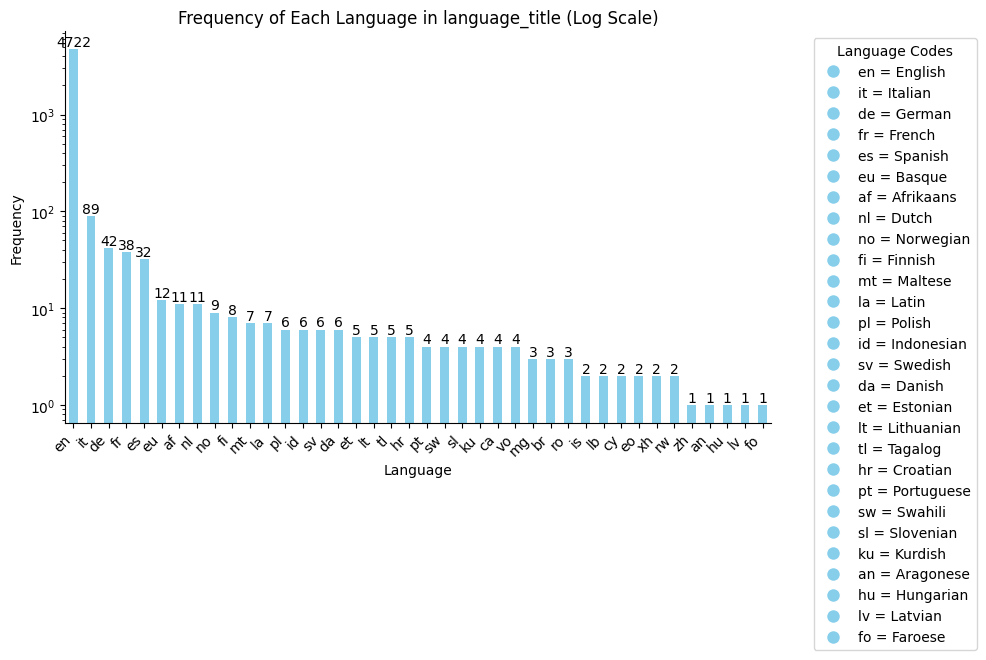

In [ ]:
# Assuming df_food_trial is already loaded and has the 'language_title' column
# Language code to full name mapping
language_names = {
    'en': 'English', 'it': 'Italian', 'de': 'German', 'fr': 'French', 'es': 'Spanish', 'eu': 'Basque',
    'af': 'Afrikaans', 'nl': 'Dutch', 'no': 'Norwegian', 'fi': 'Finnish', 'mt': 'Maltese', 'la': 'Latin',
    'pl': 'Polish', 'id': 'Indonesian', 'sv': 'Swedish', 'da': 'Danish', 'et': 'Estonian', 'lt': 'Lithuanian',
    'tl': 'Tagalog', 'hr': 'Croatian', 'pt': 'Portuguese', 'sw': 'Swahili', 'sl': 'Slovenian', 'ku': 'Kurdish',
    'an': 'Aragonese', 'hu': 'Hungarian', 'lv': 'Latvian', 'fo': 'Faroese'
}

# Get the language counts from df_food_trial using value_counts()
language_counts = df_food_trial['language_title'].value_counts()

# Plotting the frequency of each language with log scale
fig, ax = plt.subplots(figsize=(10, 6))  # Increase figure size for more space
bars = language_counts.plot(kind='bar', color='skyblue', ax=ax)

ax.set_title('Frequency of Each Language in language_title (Log Scale)')
ax.set_xlabel('Language')
ax.set_ylabel('Frequency')
ax.set_yscale('log')  # Apply log scale to y-axis
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Display frequency values above each bar
for bar in bars.patches:
    height = bar.get_height()  # Get the height of each bar
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', 
            ha='center', va='bottom', fontsize=10)

# Create a custom legend with language names (only for languages in the dataset)
handles = []
for code, full_name in language_names.items():
    if code in language_counts.index:
        # Add custom handles to the legend if the language code exists in the dataset
        handles.append(plt.Line2D([0], [0], marker='o', color='w', label=f'{code} = {full_name}', 
                                   markerfacecolor='skyblue', markersize=10))

# Add the legend to the plot
ax.legend(handles=handles, title="Language Codes", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
ax.spines['top'].set_visible(False)  # For better appearance
ax.spines['right'].set_visible(False)  # For better appearance
plt.tight_layout()  # Adjust layout to ensure no clipping

# Display the plot
plt.show()


- Observations:
    - `English` ('en') emerges as the `dominant language` in the dataset, `followed by Italian` ('it') `and then German` ('de'). Notably, the frequency of incidents reported in German ('de') is approximately half of those reported in Italian ('it').
    - A legend has been incorporated into the plot to clarify the meaning of the two-letter language codes, ensuring easier interpretation of the chart.
    - Due to the significant imbalance in the dataset—where English predominates—log-scale was applied to the y-axis of the bar chart. This adjustment allows for better visibility of low-frequency languages, such as Faroese ('fo').
Insights:

- `Most Food Incidents`:
    - `Countries or regions where English is the dominant language` (e.g., the United States or the United Kingdom) report the highest number of food incidents. This likely reflects a combination of factors, such as a larger dataset, higher levels of reporting, or robust tracking systems. 
        - From the previous plots, we verifies that United States indeed has the most fod incidents.
- Fewest Food Incidents:
    - Languages such as Aragonese ('an'), Hungarian ('hu'), Latvian ('lv'), and Faroese ('fo') have the lowest number of reported food incidents. This could be attributed to smaller population sizes, less frequent reporting, or limited data collection in regions where these languages are spoken.
This analysis provides a clear understanding of the language-based distribution of food incident reports and sets the stage for further exploration of trends in incident frequency over time.
- Furthermore, we will check the food  combining detected `Lnguage` and `Year`.  

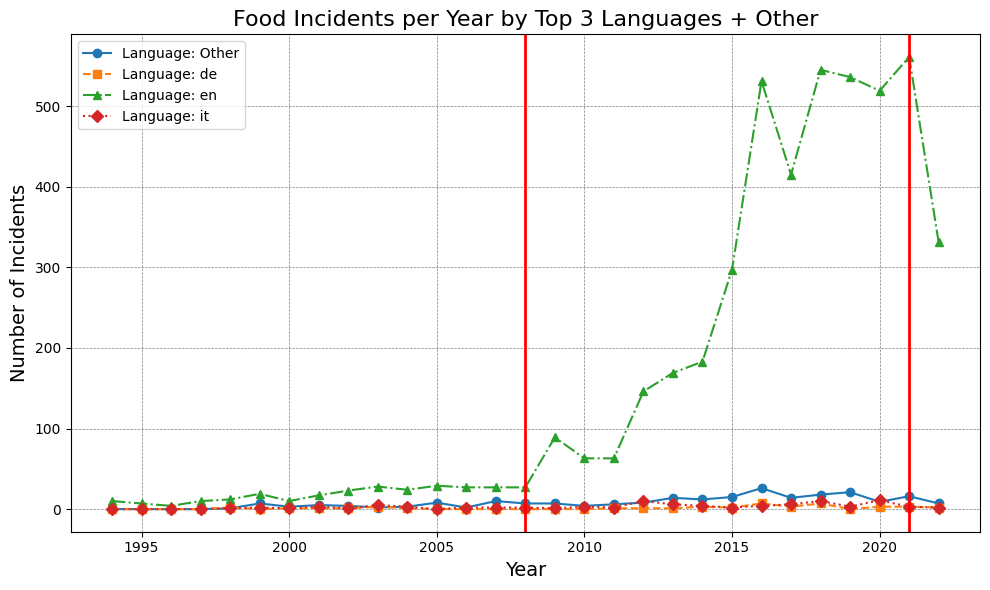

In [ ]:
# Group by year and language, count occurrences, and sort by total occurrences across all years
language_counts = df_food_trial[['year','title','language_title']].groupby('language_title').size().sort_values(ascending=False)

# Get the top 3 most frequent languages
top_languages = language_counts.head(3).index

# Replace other languages with 'Other'
df_food_trial['language_title'] = df_food_trial['language_title'].apply(lambda x: x if x in top_languages else 'Other')

# Recalculate the number of incidents per year for each language (including 'Other')
incident_count_per_year_language = df_food_trial.groupby(['year', 'language_title']).size().unstack(fill_value=0)

# Plotting the data
plt.figure(figsize=(10, 6))

# Define distinct line styles and markers for each language
line_styles = ['-', '--', '-.', ':', '-']
markers = ['o', 's', '^', 'D', 'x']

# Plot only the top 3 languages and 'Other'
for i, language in enumerate(incident_count_per_year_language.columns):
    plt.plot(incident_count_per_year_language.index, incident_count_per_year_language[language], 
             label=f"Language: {language}", marker=markers[i], linestyle=line_styles[i])

# Adding labels and title
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Incidents', fontsize=14)
plt.title('Food Incidents per Year by Top 3 Languages + Other', fontsize=16)
plt.legend(loc='upper left', fontsize=10)

# Add a grid with a lighter color
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')

# Add a red vertical line at year 2020
plt.axvline(x=2008, color='red', linestyle='-', linewidth=2, label='2020 Trend Change')
plt.axvline(x=2021, color='red', linestyle='-', linewidth=2, label='2021 Trend Change')

# Show the plot with tight layout
plt.tight_layout()
plt.show()

- We observe a notable `increase in food incidents` `from 2008 to 2021`. However, following 2021, there is a clear decline in the number of incidents.
    - The vertical red lines represent the time period during which food incidents exhibited a significant increase, highlighting the duration of this upward trend.
- Other category represnts all other languages except english and italian.
--------------------------------------
- Having an overall view for the diffrent languages in our columns "title" and "text", we thought that it would be a good approach to `translate non english text data  in the English language` for the following reasons: 
1. `Consistency in Feature Space`
    - (Because in teh next steps we will use TF-IDF for vectorisinf the text data) TF-IDF generates a vector representation of the text where each term corresponds to a dimension. If your dataset contains text in multiple languages, the feature space will include terms from all languages. This can lead to an overly sparse and large feature space, making the classifier less efficient and harder to train.
2.  `Cross-Language Semantics`
    - Words with similar meanings in different languages will be treated as unrelated by TF-IDF since they appear as different tokens. Translating all text into a single language ensures that semantically similar terms contribute consistently to the feature vectors.
3. `Ease of Model Training`
    - Classifiers often perform better when trained on consistent data. Mixing languages can lead to misinterpretations of the importance of certain terms and potentially decrease the model’s performance.
- In the following code, we will implement the related code for translating non english text data to the engish language.

In [ ]:
# Function to translate text
def translate_text_ensure(text):
    """
    Ensures text is translated correctly.
    - Handles missing or empty strings.
    - Reattempts translation if the output is the same as the input.
    """
    if not text or pd.isnull(text):  # Skip None or empty values
        return ""
    try:
        translator = GoogleTranslator(source='auto', target='en')
        translated = translator.translate(text)
        
        # Reattempt translation if output matches input
        if translated.strip().lower() == text.strip().lower():
            translated = translator.translate(text)  # Retry translation
        
        return translated
    except Exception as e:
        return f"Error: {str(e)}"

In [ ]:
print("Number of non-english for title: ", df_food_trial[df_food_trial['language_title'] != 'en'].shape[0])
print("Number of non-english for text: ", df_food_trial[df_food_trial['language_text'] != 'en'].shape[0])

Number of non-english for title:  360
Number of non-english for text:  3


- We will isolate in seperate dataframes teh row havinf non english text data in teh columns "title" and "text".
- We will apply the english translatin in the related columns leveraging teh function `translate_text_ensure`. 

In [ ]:
df_non_en_text = df_food_trial[df_food_trial['language_text'] != 'en'] # 3 rows; save rows having in column "text" language diffrent than the english one. 
df_non_en_tilte = df_food_trial[df_food_trial['language_title'] != 'en'] # 360 rows;  save rows having in column "title" language diffrent than the english one. 
# Apply the translation function to the DataFrame
df_non_en_text["text_translated"] = df_non_en_text["text"].apply(translate_text_ensure)
df_non_en_tilte["title_translated"] = df_non_en_tilte["title"].apply(translate_text_ensure)

In [ ]:
print("Number of Rows with seperate translation than the original one: ", df_non_en_tilte[df_non_en_tilte['title'] != df_non_en_tilte['title_translated']].shape[0] , "Total Number of roWS non-en in column title : ", df_non_en_tilte.shape[0])
df_non_en_tilte[df_non_en_tilte['title'] != df_non_en_tilte['title_translated']] 

Number of Rows with seperate translation than the original one:  24 Total Number of roWS non-en in column title :  360


,year,month,day,country,title,text,hazard-category,product-category,hazard,product,language_text,language_title,title_translated
68,1999,9,7,au,Acquilla Bulk Trading—Sasso Pasta D'acciughe L...,PRA No. 1999/4071 Date published 7 Sep 1999 Pr...,chemical,seafood,toxin,anchovy paste,en,it,Acquilla Bulk Trading—Sasso Anchovy Paste Sea ...
100,2001,7,31,au,Pagasa—Dried Mackeral,PRA No. 2001/4849 Date published 31 Jul 2001 P...,chemical,seafood,toxin,mackerel,en,Other,Pagasa—Dried Mackerel
148,2003,1,23,au,Paesanella Cheese—Bocconcini cheese,PRA No. 2003/5936 Date published 23 Jan 2003 P...,biological,"meat, egg and dairy products",escherichia coli,cheese,en,it,Paesanella Cheese—Cheese Bites
174,2003,9,23,au,Barilla—Arrabbiata Pasta Sauce & Barilla Pesto...,PRA No. 2003/6478 Date published 23 Sep 2003 P...,chemical,"soups, broths, sauces and condiments",other,pasta sauce,en,it,Barilla—Arrabbiata Pasta Sauce & Barilla Calab...
261,2006,6,1,au,Tibaldi Smallgoods—Loin Capocollo mild,PRA No. 2006/8543 Date published 1 Jun 2006 Pr...,biological,"meat, egg and dairy products",salmonella,pork fillets,en,it,Tibaldi Smallgoods—Loin Capocollo Mild
350,2008,10,14,au,Bella Fantasia—240mL Hazelnut Gelato and 3-pac...,PRA No. 2008/10377 Date published 14 Oct 2008 ...,biological,ices and desserts,listeria monocytogenes,ice cream,en,it,Bella Fantasia—240mL Hazelnut Gelato and 3-pac...
442,2009,10,28,au,"Ettason Pty Ltd—Punchun Sesame Sauce, 290g jar",PRA No. 2009/11184 Date published 28 Oct 2009 ...,fraud,"nuts, nut products and seeds",labelling/misdescription,sesame,en,Other,"Ettason Pty Ltd—Punch Sesame Sauce, 290g jar"
542,2011,5,9,au,Fetta - Microbial (E. coli) - 9 May 2011,Problem: Cottage Cheese Farm is conducting a r...,biological,"meat, egg and dairy products",escherichia coli,cheese,en,Other,Slice - Microbial (E. coli) - 9 May 2011
548,2011,6,6,au,Hunsa Smallgoods—Hunza Chorizo,PRA No. 2011/12628 Date published 6 Jun 2011 P...,biological,"meat, egg and dairy products",listeria monocytogenes,chorizo sausage,en,Other,Ignore Smallgoods—Hunza Chorizo
568,2011,9,17,us,2013 - Del Bueno Recalls Queso Fresco Casero C...,"Del Bueno of Grandview, WA is recalling all 16...",biological,"meat, egg and dairy products",listeria monocytogenes,fresh cheese,en,it,2013 - Del Bueno Recalls Queso Fresco Casero C...


- Key Note: Despite the Englidh translation in the column `title` we observe that only 24 out of 360 changed. 
- And the translations for these 23 rows is trivial due to product names mostly. 
- So, we will apply translation only for teh column "text" despite the low number of rows being equal to 3. 

In [ ]:
df_food_trial = df_food_trial.drop(df_non_en_text.index) # Drop rows from original_df based on indexes in isolated_df
df_food_trial.reset_index(drop=True, inplace=True) # Reset the index if needed
df_food_trial

,year,month,day,country,title,text,hazard-category,product-category,hazard,product,language_text,language_title
0,1994,1,7,us,Recall Notification: FSIS-024-94,Case Number: 024-94 Date Opened...,biological,"meat, egg and dairy products",listeria monocytogenes,smoked sausage,en,en
1,1994,3,10,us,Recall Notification: FSIS-033-94,Case Number: 033-94 Date Opened...,biological,"meat, egg and dairy products",listeria spp,sausage,en,en
2,1994,3,28,us,Recall Notification: FSIS-014-94,Case Number: 014-94 Date Opened...,biological,"meat, egg and dairy products",listeria monocytogenes,ham slices,en,en
3,1994,4,3,us,Recall Notification: FSIS-009-94,Case Number: 009-94 Date Opened...,foreign bodies,"meat, egg and dairy products",plastic fragment,thermal processed pork meat,en,en
4,1994,7,1,us,Recall Notification: FSIS-001-94,Case Number: 001-94 Date Opened...,foreign bodies,"meat, egg and dairy products",plastic fragment,chicken breast,en,en
...,...,...,...,...,...,...,...,...,...,...,...,...
5074,2022,7,28,hk,Imported biscuit may contain allergen (peanuts),Imported biscuit may contain allergen (peanuts...,allergens,cereals and bakery products,peanuts and products thereof,biscuits,en,en
5075,2022,7,28,us,Danny’s Sub and Pizza Recalls Meat Pizza Produ...,023-2022 High - Class I Produced Wi...,fraud,prepared dishes and snacks,inspection issues,pizza,en,en
5076,2022,7,29,us,Lyons Magnus Voluntarily Recalls 53 Nutritiona...,"FRESNO, Calif. – July 28, 2022 – Lyons Magnus ...",biological,non-alcoholic beverages,cronobacter spp,non-alcoholic beverages,en,en
5077,2022,7,30,us,"Conagra Brands, Inc., Recalls Frozen Beef Prod...",025-2022 High - Class I Misbranding...,allergens,"meat, egg and dairy products",eggs and products thereof,frozen beef products,en,en


- We removed the three rows.

In [ ]:
# before intagret translated text data to the main datfarame we will rename, drop related columns and order the columns follow the order of df_food_trial df.
df_non_en_text = df_non_en_text.drop(columns=["text"])
df_non_en_text = df_non_en_text.rename(columns={"text_translated": "text"})
desired_order = ["year", "month", "day","country", "title", "text", "hazard-category", "product-category", "hazard", "product", "language_text", "language_title"]
df_non_en_text = df_non_en_text[desired_order]
df_non_en_text

,year,month,day,country,title,text,hazard-category,product-category,hazard,product,language_text,language_title
868,2013,7,13,us,2009 - spanish: torres hillsdale country chees...,FOR IMMEDIATE RELEASE -- FOR IMMEDIATE ANNOUNC...,biological,"meat, egg and dairy products",listeria monocytogenes,cheese,es,en
4855,2021,3,3,us,El Abuelito EXPANDE SU RETIRO DEL MERCADO PARA...,"When a company announces a recall, withdrawal,...",biological,"meat, egg and dairy products",listeria monocytogenes,cheese,es,Other
5093,2021,6,28,ca,"Lelièvre, Lelièvre & Lemoignan ltée. brand « H...","Notification - Lelièvre, Lelièvre & Lemoignan ...",biological,seafood,listeria monocytogenes,lobster,fr,Other


In [ ]:
df_food_trial = pd.concat([df_food_trial, df_non_en_text], ignore_index=True)
df_food_trial

,year,month,day,country,title,text,hazard-category,product-category,hazard,product,language_text,language_title
0,1994,1,7,us,Recall Notification: FSIS-024-94,Case Number: 024-94 \n Date Opene...,biological,"meat, egg and dairy products",listeria monocytogenes,smoked sausage,en,en
1,1994,3,10,us,Recall Notification: FSIS-033-94,Case Number: 033-94 \n Date Opene...,biological,"meat, egg and dairy products",listeria spp,sausage,en,en
2,1994,3,28,us,Recall Notification: FSIS-014-94,Case Number: 014-94 \n Date Opene...,biological,"meat, egg and dairy products",listeria monocytogenes,ham slices,en,en
3,1994,4,3,us,Recall Notification: FSIS-009-94,Case Number: 009-94 \n Date Opene...,foreign bodies,"meat, egg and dairy products",plastic fragment,thermal processed pork meat,en,en
4,1994,7,1,us,Recall Notification: FSIS-001-94,Case Number: 001-94 \n Date Opene...,foreign bodies,"meat, egg and dairy products",plastic fragment,chicken breast,en,en
...,...,...,...,...,...,...,...,...,...,...,...,...
5077,2022,7,30,us,"Conagra Brands, Inc., Recalls Frozen Beef Prod...",025-2022\n\n \n High - Class I\n\n Misbra...,allergens,"meat, egg and dairy products",eggs and products thereof,frozen beef products,en,en
5078,2022,7,30,us,Rachael’s Food Corporation Recalls Ready-To-Ea...,024-2022\n\n \n High - Class I\n\n Produc...,biological,prepared dishes and snacks,listeria monocytogenes,wraps,en,en
5079,2013,7,13,us,2009 - spanish: torres hillsdale country chees...,FOR IMMEDIATE RELEASE -- FOR IMMEDIATE ANNOUNC...,biological,"meat, egg and dairy products",listeria monocytogenes,cheese,es,en
5080,2021,3,3,us,El Abuelito EXPANDE SU RETIRO DEL MERCADO PARA...,"When a company announces a recall, withdrawal,...",biological,"meat, egg and dairy products",listeria monocytogenes,cheese,es,Other


In [ ]:
# check fpor language; if our change passed.
df_food_trial['language_text_after_preprocess'] = df_food_trial['text'].apply(lambda x: langid.classify(x)[0])

- Let's check if the translation passes successfully. 

In [ ]:
df_food_trial[df_food_trial['language_text_after_preprocess'] != 'en']

,year,month,day,country,title,text,hazard-category,product-category,hazard,product,language_text,language_title,language_text_after_preprocess
5081,2021,6,28,ca,"Lelièvre, Lelièvre & Lemoignan ltée. brand « H...","Notification - Lelièvre, Lelièvre & Lemoignan ...",biological,seafood,listeria monocytogenes,lobster,fr,Other,fr


In [ ]:
df_food_trial['text'][df_food_trial['language_text_after_preprocess'] != 'en'].tolist()

['Notification - Lelièvre, Lelièvre & Lemoignan ltée. brand « Homards cuits » recalled due to Listeria monocytogenes From: Canadian Food Inspection Agency Recall / advisory date: June 28, 2021 Reason for recall / advisory: Microbiological - Listeria Hazard classification: Class 1 Company / Firm: Lelièvre, Lelièvre & Lemoignan ltée. Distribution: Quebec Extent of the distribution: Hotel/Restaurant/Institutional Reference number: 14473 Contents Affected products Public enquiries and media Affected products Brand Name Common Name Size UPC Code(s) on Product Lelièvre. Lelièvre & Lemoignan ltée. « Homards cuits » 30 lbs None 172-21 Packaging date: 21 juin 2021 Public enquiries and media Public enquiries Toll-free: 1-800-442-2342 (Canada and U.S.) Telephone: 1-613-773-2342 (local or international) Email: information@inspection.gc.ca Media relations Telephone: 613-773-6600 Email: cfia.media.acia@inspection.gc.ca Report a problem on this page Date modified: 2021-06-29']

- Maybe Google Translator confused as there are english terms, too. But, I will not insist on it more due to the low semantic impact.

### NLP Standard Preprocess
- Text preprocessing is essential to ensure `clean`, `consistent`, and `semantically meaningful input` for NLP models, ultimately `improving` their `performance, interpretability, and computational efficiency`.

- Preprocessing Steps of the function `preprocess_dataframe_column` (Controlled by params):
    - Lowercase Conversion: Standardizes text by converting to lowercase.
    - Punctuation Removal: Removes all punctuation marks.
    - Stopword Removal: Removes common words that add little meaning (e.g., "the", "is").
    - Number Removal: Eliminates numeric tokens.
    - Lemmatization: Converts words to their base forms (e.g., "running" → "run").
    - Stemming (Optional): Reduces words to their root forms (e.g., "running" → "run"), used if lemmatization is disabled.


In [ ]:
def nlp_preprocess_dataframe(
    df,
    column,
    lowercase=True,
    remove_punctuation=True,
    remove_stopwords=True,
    remove_numbers=True,
    lemmatization=True,
    stemming=True
):
    """
    Preprocesses a specified column of a DataFrame.

    Args:
        df (pd.DataFrame): The DataFrame to preprocess.
        column (str): Name of the column to preprocess.
        lowercase (bool): Convert text to lowercase. Default is True.
        remove_punctuation (bool): Remove punctuation. Default is True.
        remove_stopwords (bool): Remove common stopwords. Default is True.
        remove_numbers (bool): Remove numeric tokens. Default is True.
        lemmatization (bool): Apply lemmatization. Default is True.
        stemming (bool): Apply stemming. Default is True.

    Returns:
        None: The function directly modifies the input DataFrame.
    """
    # Initialize tools
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    stemmer = PorterStemmer()

    def preprocess_text(text):
        if pd.isnull(text):  # Handle NaN values
            return text
        # Tokenize the text
        tokens = word_tokenize(str(text))

        # Convert to lowercase
        if lowercase:
            tokens = [token.lower() for token in tokens]

        # Remove punctuation
        if remove_punctuation:
            tokens = [token for token in tokens if token not in string.punctuation]

        # Remove stopwords
        if remove_stopwords:
            tokens = [token for token in tokens if token not in stop_words]

        # Remove numbers
        if remove_numbers:
            tokens = [token for token in tokens if not token.isdigit()]

        # Apply lemmatization
        if lemmatization:
            tokens = [lemmatizer.lemmatize(token) for token in tokens]

        # Apply stemming
        if stemming:
            tokens = [stemmer.stem(token) for token in tokens]

        # Join tokens back to a single string
        return ' '.join(tokens)

    # Apply preprocessing directly to the specified column
    df[column] = df[column].apply(preprocess_text)

- Let's call the function `preprocess_dataframe_column` for the preprocess.

In [ ]:
# Call the function to preprocess a specific column
nlp_preprocess_dataframe(
    df_food_trial,            # DataFrame
    column="title",           # Column to preprocess
    lowercase=True,           # Convert to lowercase
    remove_punctuation=True,  # Remove punctuation
    remove_stopwords=True,    # Remove stopwords
    remove_numbers=True,      # Remove numeric tokens
    lemmatization=True,       # Apply lemmatization
    stemming=True             # Apply Stemming
)

nlp_preprocess_dataframe(
    df_food_trial,            # DataFrame
    column="text",            # Column to preprocess
    lowercase=True,           # Convert to lowercase
    remove_punctuation=True,  # Remove punctuation
    remove_stopwords=True,    # Remove stopwords
    remove_numbers=True,      # Remove numeric tokens
    lemmatization=True,       # Apply lemmatization
    stemming=True             # Apply stemming
)

df_food_trial

,year,month,day,country,title,text,hazard-category,product-category,hazard,product,language_text,language_title,language_text_after_preprocess
0,1994,1,7,us,recal notif fsis-024-94,case number 024-94 date open 07/01/1994 date c...,biological,"meat, egg and dairy products",listeria monocytogenes,smoked sausage,en,en,en
1,1994,3,10,us,recal notif fsis-033-94,case number 033-94 date open 10/03/1994 date c...,biological,"meat, egg and dairy products",listeria spp,sausage,en,en,en
2,1994,3,28,us,recal notif fsis-014-94,case number 014-94 date open 03/28/1994 date c...,biological,"meat, egg and dairy products",listeria monocytogenes,ham slices,en,en,en
3,1994,4,3,us,recal notif fsis-009-94,case number 009-94 date open 03/04/1994 date c...,foreign bodies,"meat, egg and dairy products",plastic fragment,thermal processed pork meat,en,en,en
4,1994,7,1,us,recal notif fsis-001-94,case number 001-94 date open 01/07/1994 date c...,foreign bodies,"meat, egg and dairy products",plastic fragment,chicken breast,en,en,en
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5077,2022,7,30,us,conagra brand inc. recal frozen beef product d...,025-2022 high class misbrand mislabel unreport...,allergens,"meat, egg and dairy products",eggs and products thereof,frozen beef products,en,en,en
5078,2022,7,30,us,rachael ’ food corpor recal ready-to-eat meat ...,024-2022 high class product contamin activ sat...,biological,prepared dishes and snacks,listeria monocytogenes,wraps,en,en,en
5079,2013,7,13,us,spanish torr hillsdal countri chees llc expand...,immedi releas -- immedi announc -- -march -- t...,biological,"meat, egg and dairy products",listeria monocytogenes,cheese,es,en,en
5080,2021,3,3,us,el abuelito expand su retiro del mercado para ...,compani announc recal withdraw safeti alert fd...,biological,"meat, egg and dairy products",listeria monocytogenes,cheese,es,Other,en


- We can observe that columns `title` and `text` altered based on basic nlp preprocess e.g. low letters.
- For simplisity we will save in our df only the needed columns. 

In [ ]:
df_food_trial = df_food_trial[['country','title','text','hazard-category','product-category','hazard','product']]
df_food_trial

,country,title,text,hazard-category,product-category,hazard,product
0,us,recal notif fsis-024-94,case number 024-94 date open 07/01/1994 date c...,biological,"meat, egg and dairy products",listeria monocytogenes,smoked sausage
1,us,recal notif fsis-033-94,case number 033-94 date open 10/03/1994 date c...,biological,"meat, egg and dairy products",listeria spp,sausage
2,us,recal notif fsis-014-94,case number 014-94 date open 03/28/1994 date c...,biological,"meat, egg and dairy products",listeria monocytogenes,ham slices
3,us,recal notif fsis-009-94,case number 009-94 date open 03/04/1994 date c...,foreign bodies,"meat, egg and dairy products",plastic fragment,thermal processed pork meat
4,us,recal notif fsis-001-94,case number 001-94 date open 01/07/1994 date c...,foreign bodies,"meat, egg and dairy products",plastic fragment,chicken breast
...,...,...,...,...,...,...,...
5077,us,conagra brand inc. recal frozen beef product d...,025-2022 high class misbrand mislabel unreport...,allergens,"meat, egg and dairy products",eggs and products thereof,frozen beef products
5078,us,rachael ’ food corpor recal ready-to-eat meat ...,024-2022 high class product contamin activ sat...,biological,prepared dishes and snacks,listeria monocytogenes,wraps
5079,us,spanish torr hillsdal countri chees llc expand...,immedi releas -- immedi announc -- -march -- t...,biological,"meat, egg and dairy products",listeria monocytogenes,cheese
5080,us,el abuelito expand su retiro del mercado para ...,compani announc recal withdraw safeti alert fd...,biological,"meat, egg and dairy products",listeria monocytogenes,cheese


### Investigate Imbalance 

## References

[1]. Randl, K., Pavlopoulos, J., Henriksson, A., & Lindgren, T. (2024). CICLe: Conformal In-Context Learning for Large-scale Multi-Class Food Risk Classification. *Findings of the Association for Computational Linguistics (ACL)*, 459-471. [Link to Paper](https://aclanthology.org/2024.findings-acl.459.pdf)
